# EVALUATION PROJECT 7:- CENSUS INCOME
# INTERNSHIP NUMBER :- 66
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape
# there are 32560 rows and 15 columns so the data is quite big

(32560, 15)

In [6]:
df.dtypes
# datatypes are divided into string (object) and int64

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.isnull().sum()
# null data is not present in the dataset

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.info()
# this shows:
# 1) there are 32560 rows and 15 columns
# 2) there are no null values in the dataset
# 3) and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
# this show :
# 1) value counts for each unique value of each column
# 2) length represents total no. of unique values for that column
# 3) for e.g :- for age column 36 is a unique value and it's value count is 898

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

# DESCRIPTION OF DATASET

In [15]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df
# all object datatype is converted into int datatype

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [18]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [ ]:
# 1) all the columns count is 32560 meaning no null value is present in the dataset
# 2) skewness is present in the dataset ,if mean > median (50%)-> right skew and if median > mean -> left skew
#    right skew: 'Age' , 'fnlwgt' , 'Marital status' , 'Relationship' , 'Capital gain'(hihgly) , 'capital loss'(highly) 
#    left skew: 'Work class' , 'Education' , 'Marital status' , 'Ocuupation' , 'Race' , 'Sex' ,  'Hours per week' , 
#               'native country' 
# 3) outliers are present in the dataset, if there is a jump in the value of 75% and 100% outliers maybe present
#    e.g:- 'Age'(highly) , 'Work class' , 'Education' , 'Education num' , 'Marital status' , 'Capital gain'(highly) ,
#          'capital loss'(highly) , 'Hours per week'(highly) , 'Native country'

# CHECKING SKEWNESS

<Axes: xlabel='Age', ylabel='Density'>

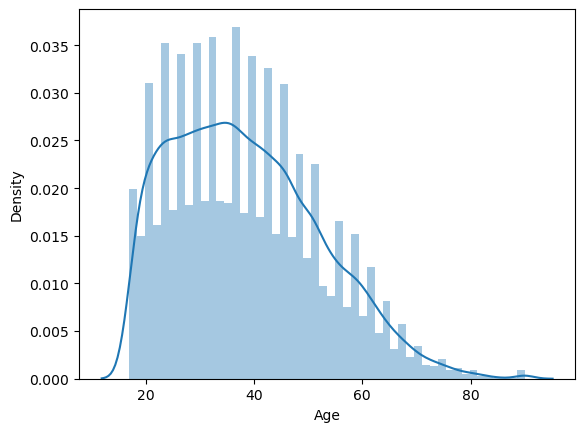

In [20]:
sns.distplot(df['Age'])

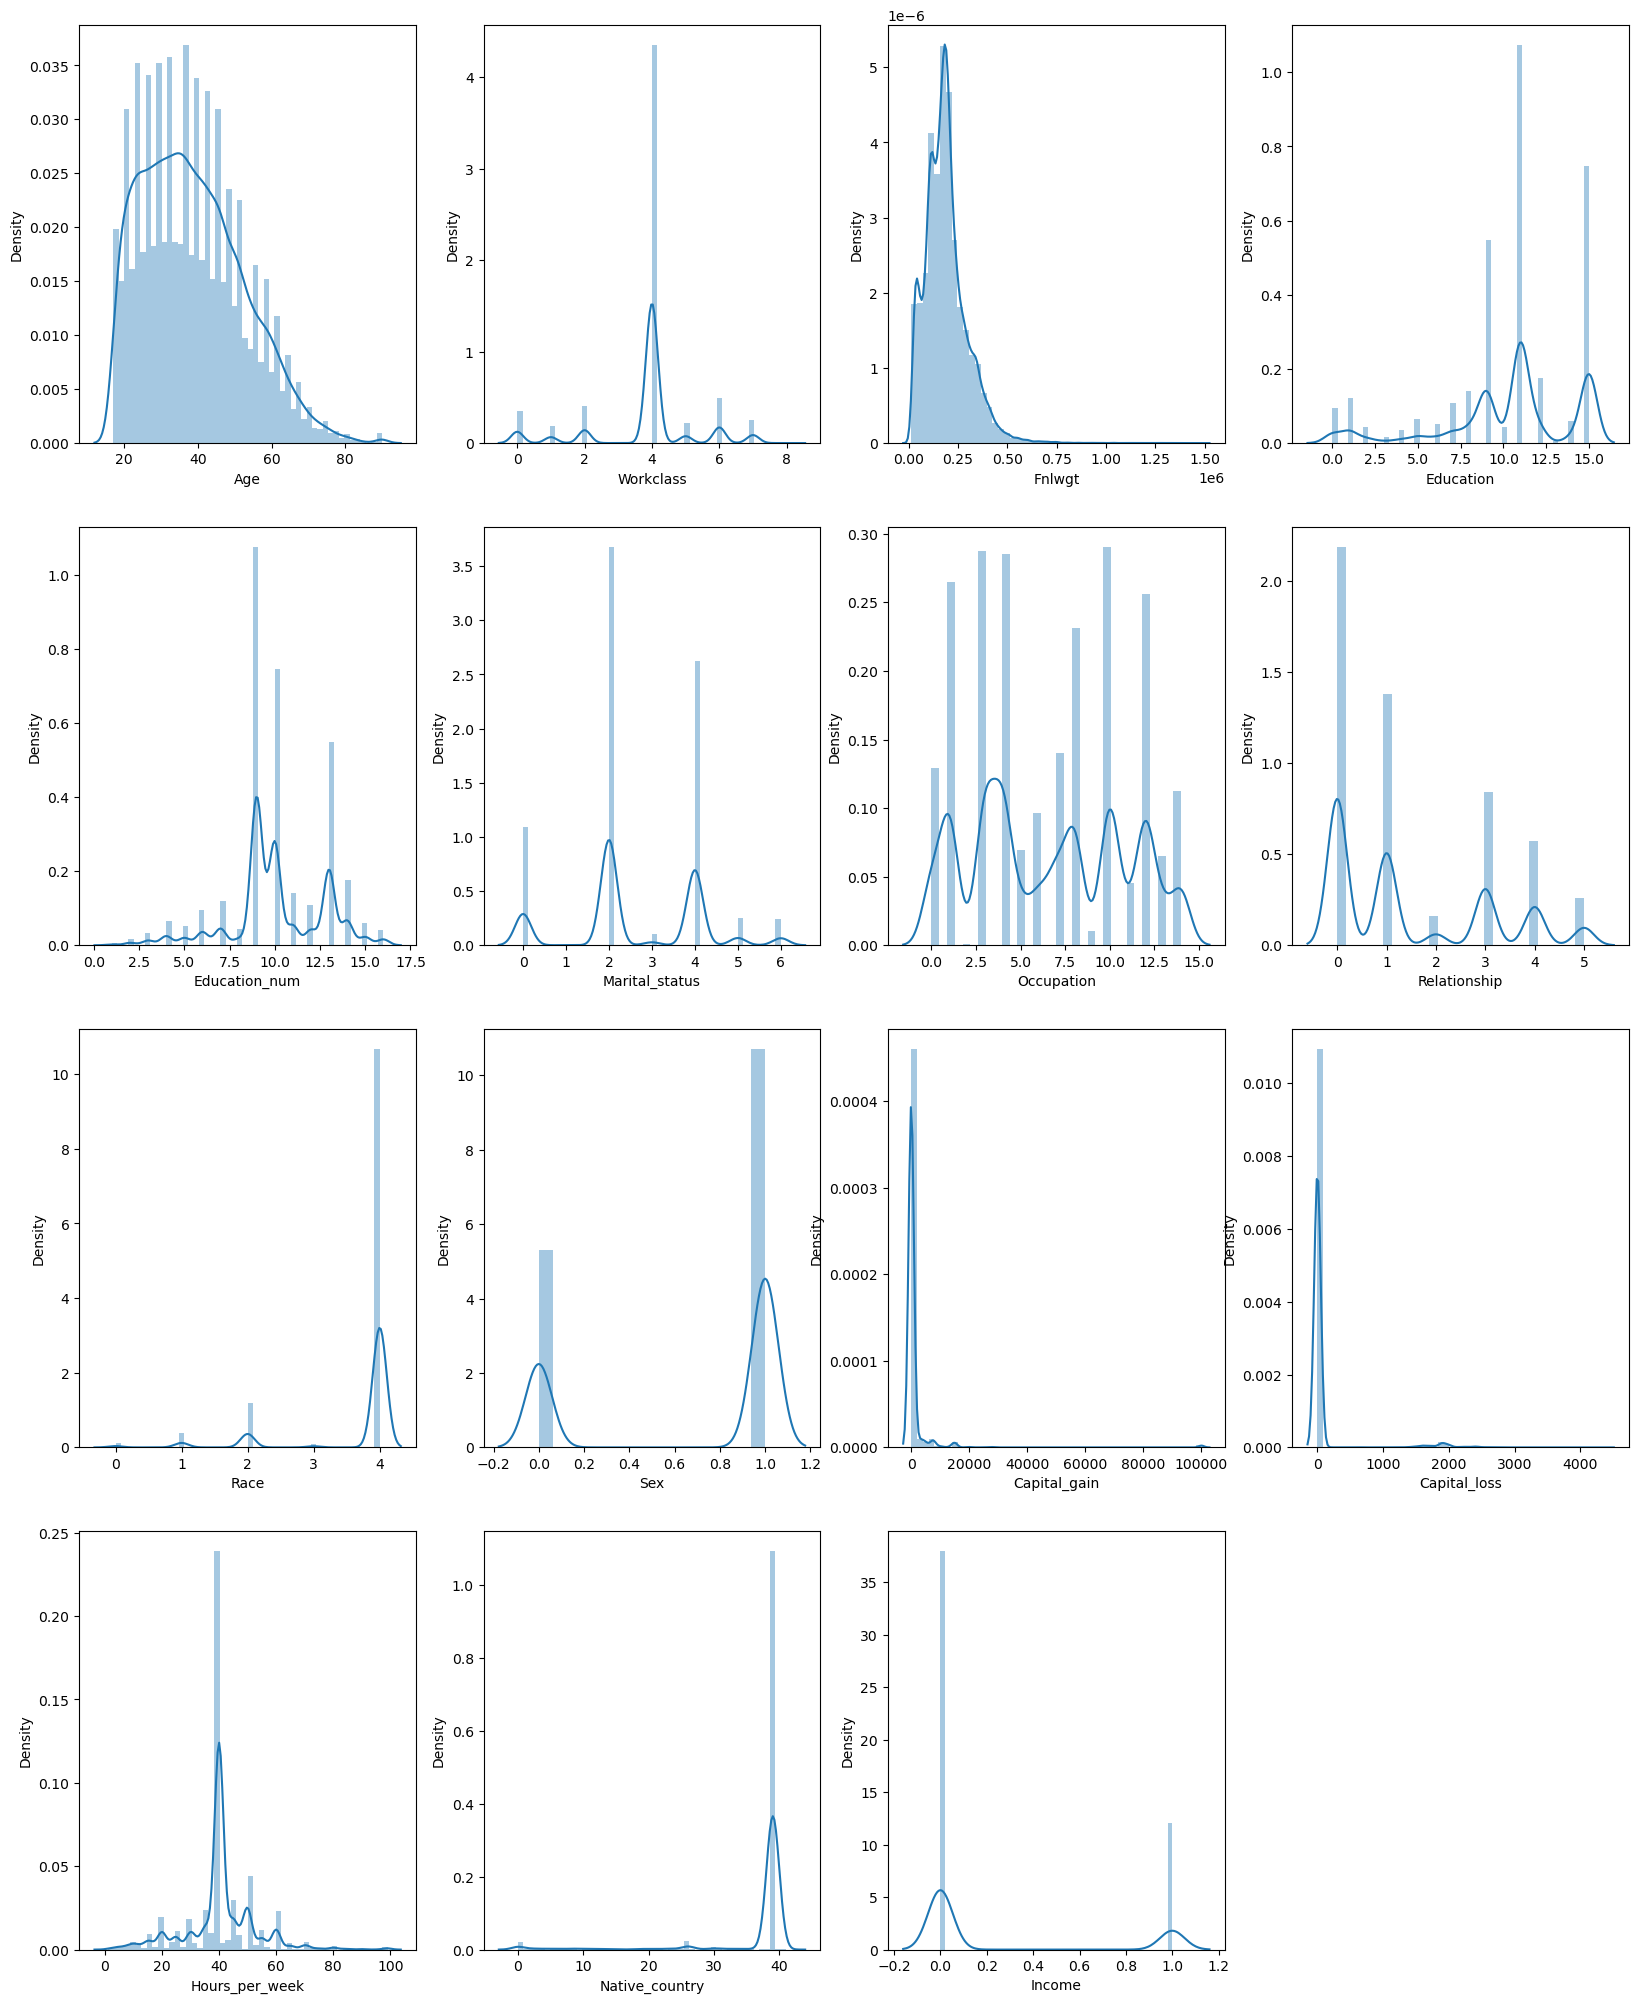

In [24]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the displot from above that skewness is present in some of the columns
# right skewed :- 'Age' , 'fnlwgt' , 'Relationship' , 'Capital gain' , 'Capital loss' , 'Hours per week'
# left skewed :- 'Education' , 'Education num' , 'Race' , 'Sex' , 'Native country'
# categorical data is:-
# 'work class' , 'Education' , 'Marital status' , 'Occupation' , 'Relationship' , 'Race' , 'Sex' , 'Native country' , 'Income'


In [25]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()
# Positive value means the distribution is skewed to the right.
# Negative value means the distribution is skewed to the left.
# 0 means perfect normal distribution. The bell shaped curve.

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [26]:
#removing skewness using cuberoot method
# these are the columns which have values more or less than +0.5 and -0.5 resp.
df['Age']=np.cbrt(df['Age'])
# df['Workclass']=np.cbrt(df['Workclass'])
df['Fnlwgt']=np.cbrt(df['Fnlwgt'])
# df['Education']=np.cbrt(df['Education'])
# df['Relationship']=np.cbrt(df['Relationship'])
# df['Race']=np.cbrt(df['Race'])
# df['Sex']=np.cbrt(df['Sex'])
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])
# df['Native_country']=np.cbrt(df['Native_country'])
# 'Work class' , ' Education' , 'Relationship' , 'Race' , 'Sex' are categorical columns so it's better to not their skewness

In [27]:
df.skew()

Age               0.090565
Workclass        -0.752280
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [28]:
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])

In [29]:
df.skew()

Age               0.090565
Workclass        -0.752280
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.103182
Capital_loss      4.304693
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [30]:
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])

In [31]:
df.skew()

Age               0.090565
Workclass        -0.752280
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.025657
Capital_loss      4.300148
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [ ]:
# 'Capital gain' and 'Capital loss' columns skewness is not removing further so it's better to stop here 

# CHECKING FOR OUTLIERS

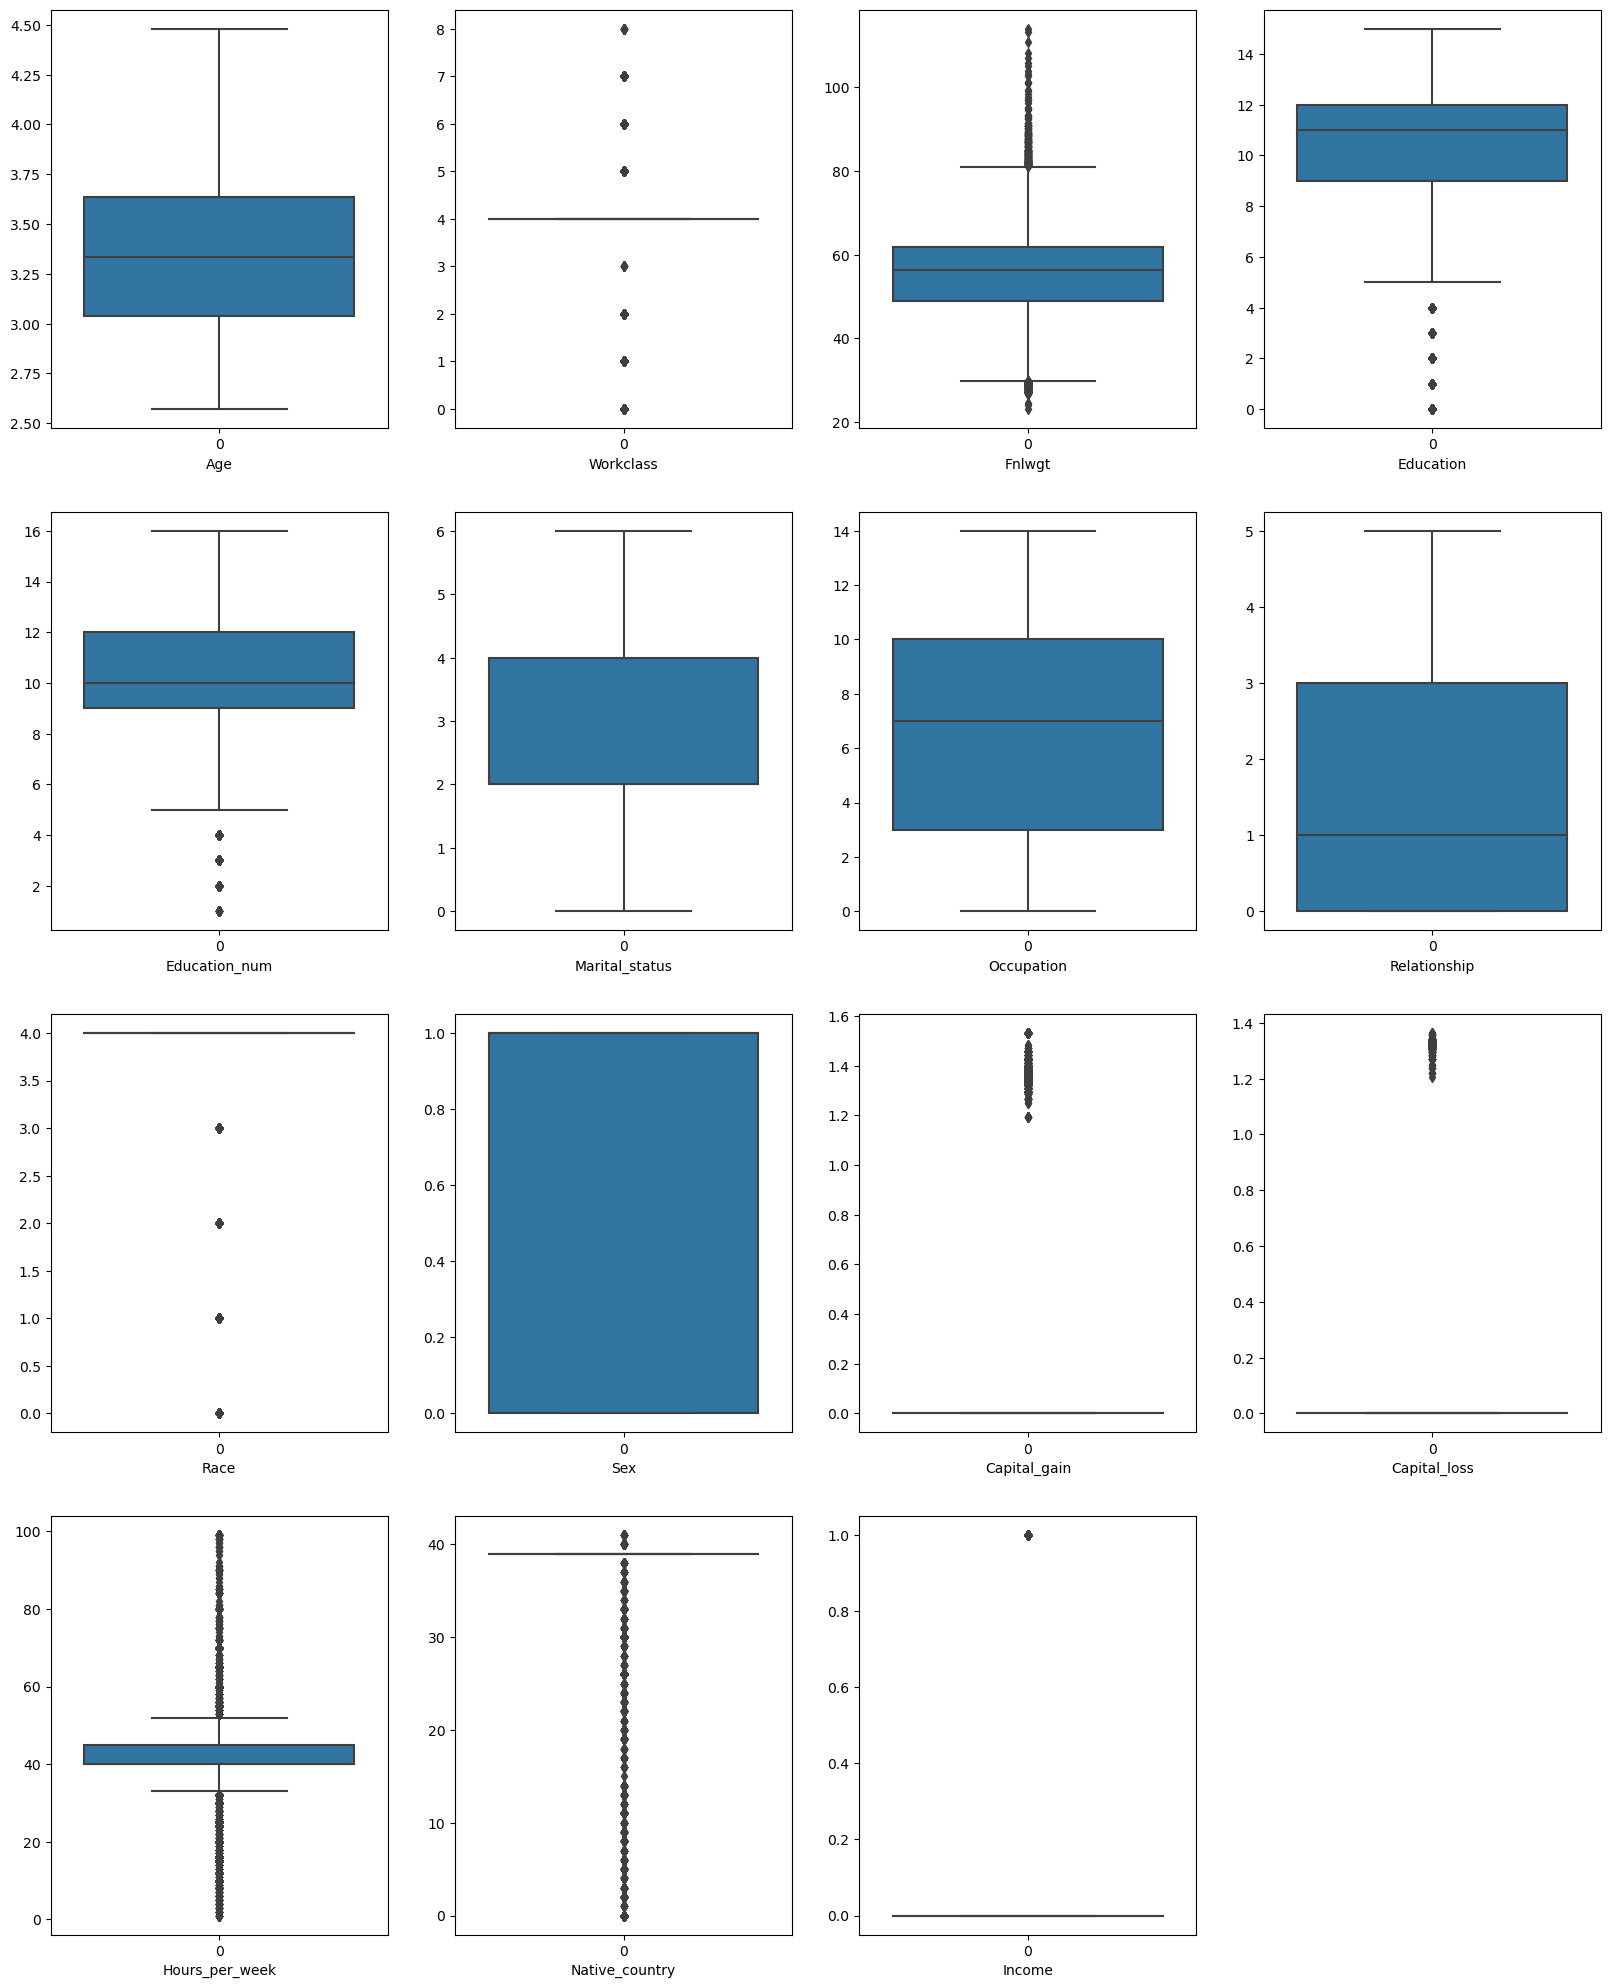

In [33]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in df.columns :
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from boxplots that outliers are present in the dataset
# outliers are present in :- ' Work class' , 'fnlwgt' , 'Education' , 'Education' , 'Race' , 'Capital gain' , 'Capital loss'
#                            'Hours per week' , 'Native country' ,'Income'

In [35]:
#removing outliers
from scipy.stats import zscore
d=df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']]
z=np.abs(zscore(d))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.885683,1.463883,1.087299,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.301132,0.221203,2.222120,0.291573,0.563210
1,0.075029,0.090121,0.417231,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.301132,0.221203,0.035430,0.291573,0.563210
2,1.067556,0.090121,0.575923,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.301132,0.221203,0.035430,0.291573,0.563210
3,0.744007,0.090121,1.314762,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.301132,0.221203,0.035430,4.054157,0.563210
4,0.000136,0.090121,0.953682,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.301132,0.221203,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.836106,0.090121,0.753034,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.301132,0.221203,0.197407,0.291573,0.563210
32556,0.220963,0.090121,0.166659,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.301132,0.221203,0.035430,0.291573,1.775537
32557,1.355995,0.090121,0.193158,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.301132,0.221203,0.035430,0.291573,0.563210
32558,1.334397,0.090121,0.293303,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.301132,0.221203,1.655200,0.291573,0.563210


In [34]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [36]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64),
 array([13, 10, 10, ...,  8,  8, 10], dtype=int64))

In [45]:
import numpy as np  
outlier_indices = np.where(z > 3)[1]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (32560, 15)
DataFrame Shape after Removing Outliers: (32553, 15)


In [47]:
32560-32553
# 7 rows are removed

7

In [46]:
# 7 rows have been deleted
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 0.02% we lose 0.02% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

0.0214987714987715

In [50]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df2 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df2.shape)

Original DataFrame Shape: (32560, 15)
DataFrame Shape after Removing Outliers: (25446, 15)


In [51]:
(df.shape[0]-df2.shape[0])/(df.shape[0])*100
# since 21% data is removed we cannot afford to lose more than 10% data so we cannot use this method

21.848894348894348

In [53]:
32560-25446
# 7114 rows removed

7114

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [48]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.021806,-0.067229,0.003161,0.062197,-0.307185,-0.011768,-0.279877,0.024042,0.099672,0.124935,0.055482,0.117053,-0.005028,0.259149
Workclass,0.021806,1.000000,-0.016114,0.023575,0.051940,-0.064778,0.254996,-0.090410,0.049968,0.095912,0.019692,0.010280,0.138990,-0.007555,0.051537
Fnlwgt,-0.067229,-0.016114,1.000000,-0.029075,-0.040709,0.027525,0.002638,0.010161,-0.013177,0.022761,-0.002381,-0.005848,-0.022706,-0.058782,-0.004388
Education,0.003161,0.023575,-0.029075,1.000000,0.359211,-0.038410,-0.021273,-0.011010,0.013860,-0.027253,0.022571,0.016501,0.055525,0.064248,0.079348
Education_num,0.062197,0.051940,-0.040709,0.359211,1.000000,-0.069366,0.109814,-0.094262,0.031914,0.012328,0.120016,0.076658,0.148164,0.050960,0.335175
Marital_status,-0.307185,-0.064778,0.027525,-0.038410,-0.069366,1.000000,-0.009634,0.185458,-0.068106,-0.129317,-0.064157,-0.036133,-0.190532,-0.023931,-0.199251
Occupation,-0.011768,0.254996,0.002638,-0.021273,0.109814,-0.009634,1.000000,-0.075567,0.006879,0.080247,0.017893,0.018819,0.080326,-0.012591,0.075488
Relationship,-0.279877,-0.090410,0.010161,-0.011010,-0.094262,0.185458,-0.075567,1.000000,-0.116390,-0.582370,-0.079972,-0.056429,-0.248985,-0.005710,-0.250819
Race,0.024042,0.049968,-0.013177,0.013860,0.031914,-0.068106,0.006879,-0.116390,1.000000,0.087489,0.023637,0.018129,0.041978,0.137319,0.072163
Sex,0.099672,0.095912,0.022761,-0.027253,0.012328,-0.129317,0.080247,-0.582370,0.087489,1.000000,0.066128,0.041679,0.229287,-0.007972,0.215912


<Axes: >

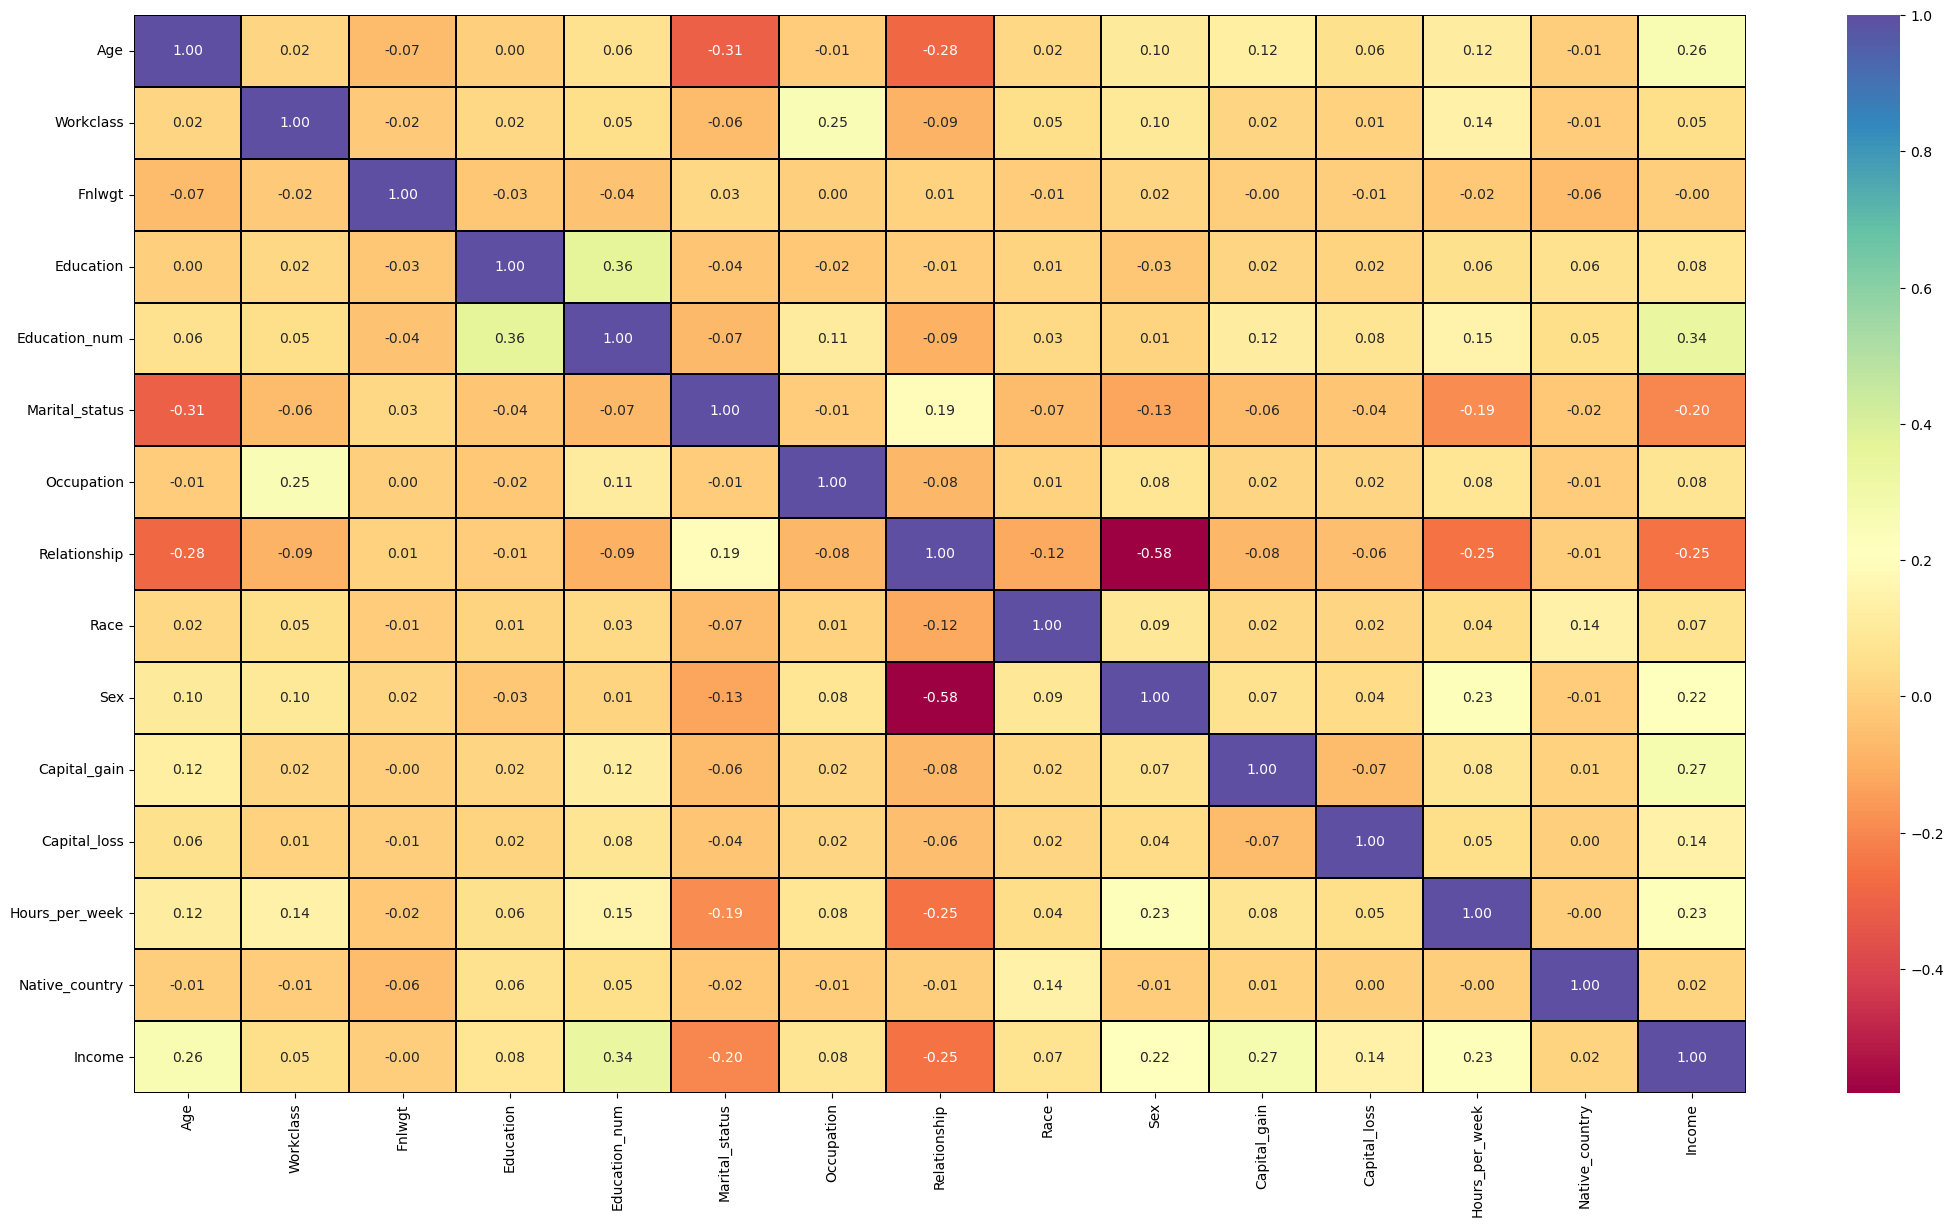

In [49]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset(having removed 7 rows)

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there is some correlation b/w columns which can cause multicollinearity like 'Education_num' and 'Education'(0.36) etc
# 3)'Income' which is label/target have also low correlation to other columns except for 'Education_num'(0.34) ,
#   'Capital_gain'(0.27)

<Axes: >

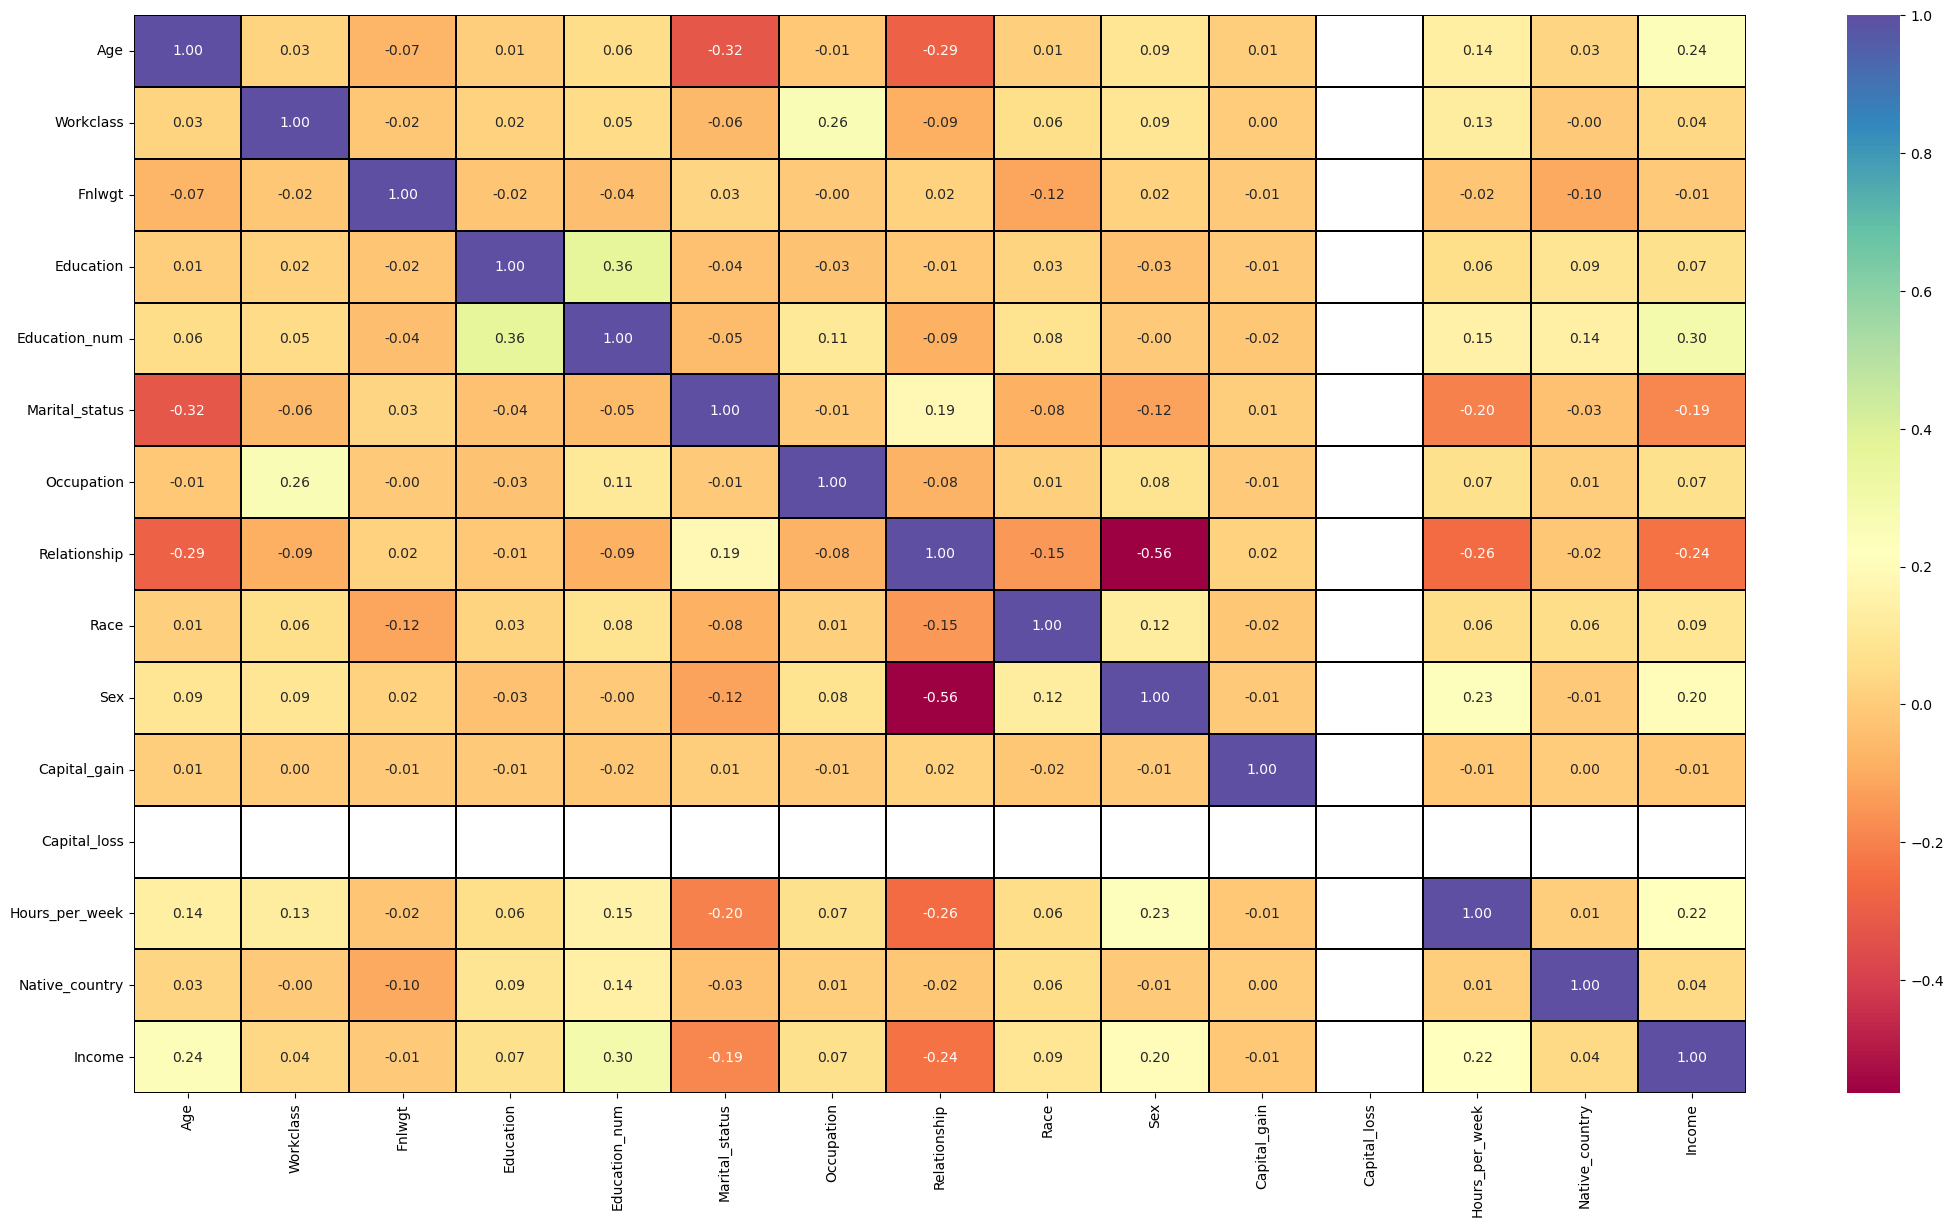

In [52]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset(having 7114 rows removed)

In [54]:
x=df1.drop(['Income'],axis=1)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.684031,6.0,43.675121,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0
1,3.361975,4.0,59.967204,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0
3,3.036589,4.0,69.686283,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.0,40,5.0
5,3.659306,4.0,54.309494,6.0,5,3.0,8.0,1.0,2.0,0.0,0.000000,0.0,16,23.0
6,3.732511,6.0,59.405424,11.0,9,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,45,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.000000,4.0,63.603506,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0
32556,3.419952,4.0,53.644440,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0
32557,3.870877,4.0,53.357498,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0
32558,2.802039,4.0,58.625222,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0


In [55]:
y=df1['Income']
y

0        0.0
1        0.0
3        0.0
5        0.0
6        1.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 32553, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df3=pd.DataFrame(s.fit_transform(x),columns=x.columns)
df3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.885616,1.463914,-1.087206,-0.335580,1.134950,-0.406161,-0.608464,-0.900228,0.393524,0.703103,-0.301107,-0.221228,-2.221934,0.291497
1,0.075009,0.090201,0.417210,0.181184,-0.419887,-1.733913,-0.135521,-0.277840,0.393524,0.703103,-0.301107,-0.221228,-0.035435,0.291497
2,-0.743982,0.090201,1.314673,-0.335580,1.134950,-0.406161,0.810365,2.211710,-1.963491,-1.422267,-0.301107,-0.221228,-0.035435,-4.055608
3,0.823382,0.090201,-0.105224,-1.110727,-1.974723,0.257715,0.337422,-0.277840,-1.963491,-1.422267,-0.301107,-0.221228,-1.978990,-1.754200
4,1.007639,1.463914,0.365335,0.181184,-0.419887,-0.406161,-0.608464,-0.900228,0.393524,0.703103,-0.301107,-0.221228,0.369473,0.291497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,-0.836075,0.090201,0.752987,-0.852345,0.746241,-0.406161,1.519779,2.211710,0.393524,-1.422267,-0.301107,-0.221228,-0.197397,0.291497
32549,0.220934,0.090201,-0.166636,0.181184,-0.419887,-0.406161,0.100951,-0.900228,0.393524,0.703103,-0.301107,-0.221228,-0.035435,0.291497
32550,1.355901,0.090201,-0.193132,0.181184,-0.419887,2.249343,-1.317878,1.589322,0.393524,-1.422267,-0.301107,-0.221228,-0.035435,0.291497
32551,-1.334338,0.090201,0.293291,0.181184,-0.419887,0.921591,-1.317878,0.966935,0.393524,0.703103,-0.301107,-0.221228,-1.655064,0.291497


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df3.values,i) for i in range(len(df3.columns))]
vif['features']=df3.columns
vif

,VIF values,features
0,1.202330,Age
1,1.093418,Workclass
2,1.010965,Fnlwgt
3,1.159356,Education
4,1.218472,Education_num
5,1.148720,Marital_status
6,1.091802,Occupation
7,1.686076,Relationship
8,1.038507,Race
9,1.560880,Sex


In [ ]:
# since vif values for all the columns are low we don't have to remove any columns fortunately

# EQUALING THE DATA

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [61]:
x1,y1=sm.fit_resample(df3,y)

In [62]:
x1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.885616,1.463914,-1.087206,-0.335580,1.134950,-0.406161,-0.608464,-0.900228,0.393524,0.703103,-0.301107,-0.221228,-2.221934,0.291497
1,0.075009,0.090201,0.417210,0.181184,-0.419887,-1.733913,-0.135521,-0.277840,0.393524,0.703103,-0.301107,-0.221228,-0.035435,0.291497
2,-0.743982,0.090201,1.314673,-0.335580,1.134950,-0.406161,0.810365,2.211710,-1.963491,-1.422267,-0.301107,-0.221228,-0.035435,-4.055608
3,0.823382,0.090201,-0.105224,-1.110727,-1.974723,0.257715,0.337422,-0.277840,-1.963491,-1.422267,-0.301107,-0.221228,-1.978990,-1.754200
4,1.007639,1.463914,0.365335,0.181184,-0.419887,-0.406161,-0.608464,-0.900228,0.393524,0.703103,-0.301107,-0.221228,0.369473,0.291497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,-0.024179,0.090201,0.109598,0.181184,-0.419887,-0.406161,-0.060164,-0.900228,0.393524,0.703103,3.292136,-0.221228,-0.035435,0.291497
49426,-0.387008,0.090201,0.658935,-0.474517,0.716918,-0.406161,-0.989929,-0.900228,-1.963491,0.703103,-0.301107,-0.221228,0.257164,0.291497
49427,0.792612,2.150770,1.234370,-0.335580,1.134950,-0.406161,0.810365,-0.900228,0.393524,0.703103,-0.301107,-0.221228,0.720364,0.291497
49428,1.355901,0.204656,-0.400428,0.353407,-0.355114,2.249343,1.283308,-0.277840,0.393524,-1.422267,-0.301107,-0.221228,-0.642758,0.291497


In [63]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
49425    1.0
49426    1.0
49427    1.0
49428    1.0
49429    1.0
Name: Income, Length: 49430, dtype: float64

In [64]:
y1.value_counts()

Income
0.0    24715
1.0    24715
Name: count, dtype: int64

In [65]:
for i in x1.columns:
    print(x1[i].value_counts())

Age
-0.076131    950
-0.232978    927
 0.000120    919
-0.313716    919
-0.480223    914
            ... 
 0.263546      1
 1.399434      1
 0.623487      1
 0.172641      1
 0.724050      1
Name: count, Length: 15743, dtype: int64
Workclass
 0.090201    32946
 1.463914     3379
-1.283512     3014
-2.657225     2119
 2.150770     1710
             ...  
 1.474505        1
-1.378487        1
-2.190953        1
 0.524795        1
 0.204656        1
Name: count, Length: 3216, dtype: int64
Fnlwgt
-0.063794    13
-0.527784    13
 0.311126    13
-0.651118    12
-0.551388    12
             ..
 0.824532     1
-1.078382     1
 1.613504     1
-2.033662     1
 1.543145     1
Name: count, Length: 38493, dtype: int64
Education
 0.181184    13692
 1.214713     9926
-0.335580     9423
 0.439567     3056
-0.593963     1718
             ...  
-0.206665        1
 0.100560        1
 0.517824        1
-0.374734        1
 0.353407        1
Name: count, Length: 4212, dtype: int64
Education_num
-0.419887   

In [ ]:
# all values are equally distributed using imblearn resample

# MODEL BUILDING

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [72]:
maxacc1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x1_train,y1_train)
    pred1=rfc.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxacc1:
        maxacc1=acc1
        maxrs1=i
print('best accuracy is',maxacc1,'at random state',maxrs1)

best accuracy is 0.9059275743475622 at random state 36


In [75]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , accuracy_score
from sklearn.model_selection import cross_val_score

In [79]:
x1_train.shape

(34601, 14)

In [80]:
x1_test.shape

(14829, 14)

In [82]:
y1_train.shape

(14829,)

In [83]:
y1_test.shape

(14829,)

In [85]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=36)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
accurfc1=accuracy_score(y1_test,predrfc1)
print('accuracy score',accurfc1)
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification report',classification_report(y1_test,predrfc1))

accuracy score 0.9038370759997303
confusion matrix [[6486  782]
 [ 644 6917]]
classification report               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      7268
         1.0       0.90      0.91      0.91      7561

    accuracy                           0.90     14829
   macro avg       0.90      0.90      0.90     14829
weighted avg       0.90      0.90      0.90     14829



In [86]:
lr=LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predlr1))
print('confusion matrix',confusion_matrix(y1_test,predlr1))
print('classification report',classification_report(y1_test,predlr1))

accuracy score 0.7746982264481759
confusion matrix [[5580 1688]
 [1653 5908]]
classification report               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      7268
         1.0       0.78      0.78      0.78      7561

    accuracy                           0.77     14829
   macro avg       0.77      0.77      0.77     14829
weighted avg       0.77      0.77      0.77     14829



In [88]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.8388967563557893
[[5632 1636]
 [ 753 6808]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.83      7268
         1.0       0.81      0.90      0.85      7561

    accuracy                           0.84     14829
   macro avg       0.84      0.84      0.84     14829
weighted avg       0.84      0.84      0.84     14829



In [90]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.8731539550880032
[[6189 1079]
 [ 802 6759]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      7268
         1.0       0.86      0.89      0.88      7561

    accuracy                           0.87     14829
   macro avg       0.87      0.87      0.87     14829
weighted avg       0.87      0.87      0.87     14829



In [91]:
abc=AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.8583855957920291
[[6170 1098]
 [1002 6559]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      7268
         1.0       0.86      0.87      0.86      7561

    accuracy                           0.86     14829
   macro avg       0.86      0.86      0.86     14829
weighted avg       0.86      0.86      0.86     14829



In [92]:
bc=BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.8863712994807472
[[6500  768]
 [ 917 6644]]
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      7268
         1.0       0.90      0.88      0.89      7561

    accuracy                           0.89     14829
   macro avg       0.89      0.89      0.89     14829
weighted avg       0.89      0.89      0.89     14829



In [93]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.9090296041540226
[[6465  803]
 [ 546 7015]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      7268
         1.0       0.90      0.93      0.91      7561

    accuracy                           0.91     14829
   macro avg       0.91      0.91      0.91     14829
weighted avg       0.91      0.91      0.91     14829



In [95]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score
rfcscore1=cvs(rfc,x1,y1)
print(rfcscore1)
print(rfcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.83643536 0.87881853 0.92757435 0.93384584 0.93283431]
0.9019016791422214
difference b/w accuracy score and cross val score 0.0019353968575088754


In [96]:
lrscore1=cvs(lr,x1,y1)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.76320049 0.77088812 0.77291119 0.77129274 0.77695731]
0.7710499696540563
differnce b/w accuracy score and cross val score 0.00364825679411962


In [97]:
svcscore1=cvs(svc,x1,y1)
print(svcscore1)
print(svcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.82277969 0.82227392 0.83734574 0.83825612 0.84169533]
0.8324701598219704
differnce b/w accuracy score and cross val score 0.00642659653381894


In [98]:
gbcscore1=cvs(gbc,x1,y1)
print(gbcscore1)
print(gbcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.82136354 0.85201295 0.88175197 0.88337042 0.8810439 ]
0.8639085575561399
difference b/w accuracy score and cross val score 0.009245397531863264


In [99]:
abcscore1=cvs(abc,x1,y1)
print(abcscore1)
print(abcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.81458628 0.84402185 0.86384787 0.86708477 0.86597208]
0.8511025692899048
difference b/w accuracy score and cross val score 0.007283026502124312


In [100]:
bcscore1=cvs(bc,x1,y1)
print(bcscore1)
print(bcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.80426866 0.86222942 0.91422213 0.92029132 0.92413514]
0.8850293344123003
difference b/w accuracy score and cross val score 0.0013419650684469708


In [101]:
etcscore1=cvs(etc,x1,y1)
print(etcscore1)
print(etcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.86991705 0.89085576 0.92858588 0.93202509 0.93101355]
0.91047946591139
difference b/w accuracy score and cross val score -0.0014498617573673878


In [ ]:
#                                                 rfc       lr      svc       gbc      abc      bc     etc
# accuracy score(%)                              90.38    77.46    83.88     87.31   85.83    88.63    90.90    
# cvs score(%)                                   90.19    77.10    83.24     86.39   85.11    88.50    91.04
# difference b/w accuracy score and cvs score    0.001    0.003    0.006     0.009   0.007    0.001   -0.001

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 90.90 and cvs score is 91.04 and difference is -0.001
#    it's accuracy is more than any other model and cvs score is also higher than anyone and diiference b/w accuracy score and 
#    cvs score is lower
# 2) other best model can be rfc , bc , gbc
#    2nd best model is rfc as it's accuracy is 2nd highest and cvs score is also 2nd highest and difference is also low 
#    similarly 3rd best model is bc and 4th best model is gbc
# 3) model is build good there are less errors and the prediction is good as well

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [102]:
import joblib
joblib.dump(etc,'INCOME OVER $50K OR NOT PREDICTION')

['INCOME OVER $50K OR NOT PREDICTION']

In [103]:
model=joblib.load('INCOME OVER $50K OR NOT PREDICTION')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test
# predicted label

array([0., 1., 1., ..., 0., 0., 0.])

In [104]:
y1_test
# real label

19226    0.0
40194    1.0
44003    1.0
39917    1.0
46034    1.0
        ... 
10544    0.0
41599    1.0
30994    0.0
26196    0.0
22722    1.0
Name: Income, Length: 14829, dtype: float64

In [ ]:
# 0 means <=50k and 1 means >50k

In [105]:
x1_test
# features used for prediction

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
19226,-0.930472,0.090201,0.395168,0.181184,-0.419887,0.921591,-1.317878,1.589322,-1.963491,-1.422267,-0.301107,-0.221228,-0.035435,-1.754200
40194,0.784416,0.090201,-0.476630,-0.077198,2.301077,-0.406161,0.810365,-0.900228,-0.057065,0.703103,-0.301107,-0.221228,0.524284,0.291497
44003,-0.197372,0.090201,-2.098816,-0.335580,1.134950,-0.406161,1.283308,-0.900228,0.393524,0.703103,-0.301107,-0.221228,0.774380,0.291497
39917,1.680902,-1.496734,-1.054009,-0.139656,-0.057884,-0.406161,0.337422,-0.900228,-3.141998,0.703103,-0.301107,-0.221228,-0.314646,0.291497
46034,0.670023,0.090201,0.654387,-0.335580,1.134950,-0.406161,-0.608464,-0.900228,0.393524,0.703103,3.644097,-0.221228,1.125369,0.291497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10544,-1.126788,0.090201,0.946718,-0.335580,1.134950,-0.406161,0.810365,-0.900228,0.393524,0.703103,-0.301107,-0.221228,-0.035435,0.291497
41599,1.028997,0.090201,-1.710479,0.439567,1.523659,-0.406161,0.162603,2.211710,0.393524,-1.422267,-0.301107,-0.221228,0.519143,0.291497
30994,-1.670701,0.090201,1.074482,1.214713,-0.031177,0.921591,1.283308,0.966935,-3.141998,0.703103,-0.301107,-0.221228,-0.440342,-1.498488
26196,-1.334338,0.090201,-2.018611,0.181184,-0.419887,1.585467,0.337422,0.344547,0.393524,0.703103,-0.301107,-0.221228,-0.440342,0.291497
